In [30]:
# 1) Which of the following are possible formulas for a growth function mH(N):
#   •  (a)1 +N
#   •  (b)1 +N(N2)
#   •  (c)∑√dN/2ei=1(N2)
#   •  (d)2dN/2e
#   •  (e)2N

# answer: a, e

In [31]:
# 2) In the Teams space (Channel – General – Class Materials) for this class (EN - SDE - 4) thereare  three  new  text  files: featurestrain.txt and featurestest.txtcontainingMNIST handwritten digit data.
#  Each file has three columns:  digit label, feature one – inten-sity, and feature two – symmetry.
  
#  (a) Read in the files and do the following:
#        •  Plot  the  histograms  of  the  first  column  to  show  the  distribution  of  labels  (digits)  forthe  training  and  test  data.   
#           The  histograms  should  match  the  numbers  as  given  in  theMNISTinfo.txt file.
#        •  Plot the histograms of the distributions of intensity and symmetry for both test and train-ing sets.
#        •  Create a new training set by changing all labels for all digits different from 5 into -1, andthen change the labels for five into 1.

#  (b) Using the training data set, train the pocket version of your perceptron function from thefirst homework. 
#      Run the pocket PLA for 10,000 iterations and then use the resulting best PLAclassifier/line to classify the test data in two groups.

#  (c) Compute the confusion matrix for your classification results and comment on the perfor-mance of the machine learning algorithm.

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import seaborn as sns
from sklearn.linear_model import Perceptron
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [33]:
test = pd.read_csv("features.test.csv")
train = pd.read_csv("features.train.csv")

train

,DigitLabel,Intensity,Symmetry
0,6.0,0.34,-4.53
1,5.0,0.44,-5.50
2,4.0,0.23,-2.89
3,7.0,0.20,-3.53
4,3.0,0.29,-4.35
...,...,...,...
7286,3.0,0.30,-2.56
7287,3.0,0.25,-3.11
7288,3.0,0.39,-2.92
7289,0.0,0.60,-2.26


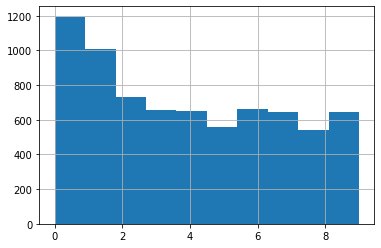

In [34]:
# a) 
labelstrain = train['DigitLabel']
labelstest = test['DigitLabel']

labelstrain.hist()

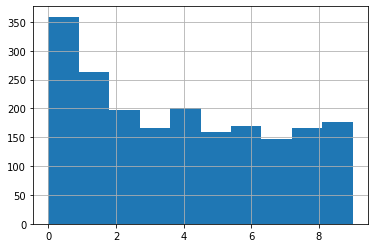

In [35]:
labelstest.hist()

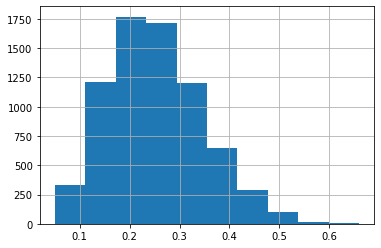

In [36]:
intensitytrain = train['Intensity']
intensitytest = test['Intensity']

intensitytrain.hist()

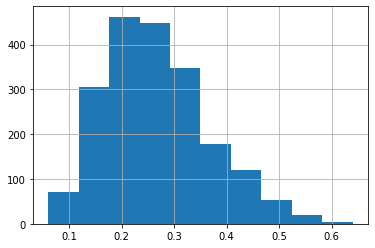

In [37]:
intensitytest.hist()

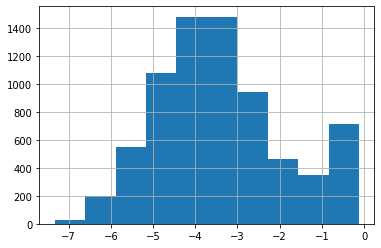

In [38]:
symmetrytrain = train['Symmetry']
symmetrytest = test['Symmetry']

symmetrytrain.hist()

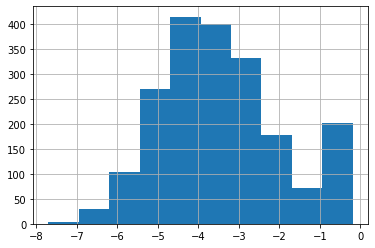

In [39]:
symmetrytest.hist()

In [40]:
train.loc[train['DigitLabel'] != 5.0, 'DigitLabel'] = -1.0
train.loc[train['DigitLabel'] == 5.0, 'DigitLabel'] = 1.0


In [41]:
trainNew = train.groupby('DigitLabel').count()
trainNew.tail()

,Intensity,Symmetry
DigitLabel,,
-1.0,6735,6735
1.0,556,556


In [42]:
#b)

train['DigitLabel']

0      -1.0
1       1.0
2      -1.0
3      -1.0
4      -1.0
       ... 
7286   -1.0
7287   -1.0
7288   -1.0
7289   -1.0
7290   -1.0
Name: DigitLabel, Length: 7291, dtype: float64

In [50]:
pocket = Perceptron(max_iter=10000, n_iter_no_change = 10000)
pocket.fit(train[['Intensity','Symmetry']], train['DigitLabel'])
pocket.score(train[['Intensity','Symmetry']], train['DigitLabel'])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


0.9237415992319298

In [51]:
pocket.n_iter_

10000

In [45]:
test.loc[test['DigitLabel'] != 5.0, 'DigitLabel'] = -1.0
test.loc[test['DigitLabel'] == 5.0, 'DigitLabel'] = 1.0

In [53]:
#c) 

predict = pocket.predict(test[['Intensity','Symmetry']])
metrics.confusion_matrix(test['DigitLabel'], predict)

array([[1847,    0],
       [ 160,    0]])

In [54]:
# data is lineraly insearable
# pocket gets the best separation when it classifies all labels as -1, because the error is smallest when done so. 
# (556 values have +1, 6735 have -1)